# Capstone proposal by Lydia Paiva 

# Predicting loneliness by socio-demographics and behavioral data for people aged >65+ years

The details are outlined in the **Proposal** unit on the platform - you should address all points from those instructions with as many markdown/code cells as needed. This should include code, observations, discussions and the planned steps.

## 1) The problem

Our population is aging and one of the risk factor is loneliness (1, 2). A 85 year Harvard study has found that the quality of relationships is the most important factor in determining happiness. The study found that people with strong, supportive relationships were happier, healthier, and lived longer than those with weak or troubled relationships. Studies also found that social fitness, or social connectivity, was more important to a long and happy life than genes, social class, or IQ (3, 4). Besides, people feel more lonely with increasing age (5). Therefore it is important to understand the problem, why people aged above 65 are lonely and which factors are mostly contributing to their loneliness. 
Therefore, the aim of my capstone project is to predict how lonely a person is given a set of features. These features can be either socio-demographic or behavior factors or both, depending on the accuracy of the outcome. These factors will contribute to predicting the most important contributors to loneliness. 

<br> References: 
1. Holt-Lunstad, J., Smith, T. B., Baker, M., Harris, T., & Stephenson, D. (2015). Loneliness and Social Isolation as Risk Factors for Mortality: A Meta-Analytic Review. 
2. Yo, Q,, Ren, Y., and Wu, J. (2024). Loneliness shapes disparities in healthy life expectancy: a multi-state analysis from China. BMC Public Health. doi:10.1186/s12889-024-18975-z.)
3. Waldinger, R., & Schulz, M. (2023). The Good Life: Lessons from the World's Longest Scientific Study of Happiness. Simon & Schuster.
4. Nguyen, X. M. T., Li, Y., Wang, D. D., Whitbourne, S. B., Houghton, S. C., Hu, F. B., ... & Wilson, P. W. (2024). Impact of 8 lifestyle factors on mortality and life expectancy among United States veterans: The Million Veteran Program
5. Ageing & Society , Volume 31 , Issue 8 , November 2011 , pp. 1368 - 1388, DOI: https://doi.org/10.1017/S0144686X1000139X)

## 2) The data

### (a) Clear overview of your data

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Source and context of the dataset:**
<br> The data is from the aging survey of the city of Zurich (https://data.stadt-zuerich.ch/dataset/gud_ds_altersbefragung). The survey has been conducted by the Institut DemoSCOPE during the period of 03.07.2023 till 27.08.2023. The study is a representative survey of the city's population aged 65 and over and is part of the “Ageing Strategy 2035” of the city of Zurich. The aim of the survey was to find out more about the living conditions, needs and opinions of older residents in the city of Zurich. Most individuals filled out the questionnaire using a paper version(88 %); 12 % filled it out online and 3 people replied through a telefon interview. The 'Departementssekretariat, Gesundheits- und Umweltdepartement' is responsible for the study. 

**Load data from the survey 'Altersbefragung' in Zurich from 2023 and the code list:**
<br>
https://www.stadt-zuerich.ch/de/politik-und-verwaltung/statistik-und-daten/daten/politik-und-verwaltung/befragungen/altersbefragung.html

In [2]:
age_df = pd.read_csv('altersbefragung_ogd.csv')
age_df.head()

,F01,F03,F06,F0701,F0702,F0703,F0704,F0901,F0902,F0903,...,S08_7,S08_8,S08_9,S08_10,S08_11,S08_12,K_SCHICHT,K_KREIS,K_GESCHLECHT,GEWICHT
0,4,2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,0,0,0,0,0,77,3,2,24.8000
1,4,1,1.0,4.0,4.0,4.0,4.0,NaN,3.0,3.0,...,0,0,0,0,0,1,70,10,2,23.9694
2,2,1,2.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,...,0,0,0,0,0,1,16,9,1,28.5568
3,4,1,2.0,1.0,NaN,NaN,NaN,3.0,4.0,4.0,...,0,0,0,0,0,1,16,9,1,28.5568
4,2,4,1.0,NaN,3.0,NaN,4.0,3.0,1.0,3.0,...,0,0,0,0,0,1,35,8,1,30.9259


In [3]:
# Load the code list with all encoded values:
code_list = pd.read_csv('codelist_altersbefragung_ogd - codelist_altersbefragung_ogd.csv')
code_list.head()

,Frage_Code,Frage_Titel,Antwort_Code,Antwort_Beschreibung
0,F01,F01: Wohlbefinden in der Stadt Zürich,1.0,Sehr ungern
1,F01,F01: Wohlbefinden in der Stadt Zürich,2.0,Eher ungern
2,F01,F01: Wohlbefinden in der Stadt Zürich,3.0,Eher gerne
3,F01,F01: Wohlbefinden in der Stadt Zürich,4.0,Sehr gerne
4,F01,F01: Wohlbefinden in der Stadt Zürich,888.0,Weiss nicht


**Observation:** It looks like some columns (=questions) are missing, since the columns jump direclty form F01 to F03 and F03 to F06. After checking the order, it does not seem that these columns appear elsewhere. These questions would include a specific number, rather than a number attribution. I will check if I can get back these rows by contacting the responsible department. 

In [4]:
# Number of features and samples
age_df.shape

(2449, 211)

In [5]:
# Information about the dataset
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Columns: 211 entries, F01 to GEWICHT
dtypes: float64(132), int64(79)
memory usage: 3.9 MB


The dataset includes 211 features and 2449 samples. Features correlate to the questions in the questionnaire and are defined by the question number apart from the last four questions which are related the neighborhood (Kreis), sex ('Geschlecht'), layer weighting variable ('Schichtvariable für die Gewichtung') and  weigthing variable (Gewichtungsvariable). The questions cover mostly socio-demographics and behavioral factors including but not limited to the living status & situation, usage of digital devices and help from others. <br> The answers are self-assessed and given by seleting one answer (as living alone, with partner, etc.). <br> Looking at the possible answers encoded, the answers are encoded with a number from 1 to 10, with a maximum of 10 possible answeres for certain questions, most questions have only 1 to 4 answers. There are 3 other codes, namely: 
- 88 stands for non-existent/deceased
- 888 for don't know
- 999 stands for nothing

**Quality of the data: missing, incorrect values, data completeness:**

In [6]:
# Data types:
pd.value_counts(age_df.dtypes)

float64    132
int64       79
dtype: int64

**Observation:** The data is stored either as float or integer. There are no object data points. 

In [7]:
# Columns with NA and number of NA's as a list and dataframe:
age_df_na_count = age_df.isna().sum().sort_values()
df_na = pd.DataFrame(age_df_na_count[age_df_na_count > 0]).T
df_na

,F21,F3702,F15,F3707,F2202,F3708,F2204,F2201,F3001,F3705,...,F25_8,F25_7,F25_6,F25_5,F25_3,F25_4,F26,F1403,F1303,F27
0,41,54,58,70,71,80,80,92,98,98,...,2297,2297,2297,2297,2297,2297,2304,2338,2346,2358


In [8]:
# Most m issing data per row (individual)
age_df.isna().sum(axis=1).sort_values().tail(10)

2217    112
2031    113
1067    115
290     115
2448    115
1039    117
2382    117
668     123
1635    125
2232    127
dtype: int64

131 columns have missing data. This is partially due to the fact that some of the question only have to be answered if the related question was positively answered (for questions F7, F11 ). For the question F25, F26, F27 and F1403 and F1303, there is the most missing data. From a total of 211 columns, some individuals have over half of the columns from the data missing. Futher investigation needs to be done to decide if all rows can be kept.

In [9]:
# Check for incorect data by looking at the descriptive statistics for each the float and integer columns seperately:
age_df.select_dtypes(include='int').describe()

,F01,F03,F11_1,F11_2,F11_3,F11_4,F11_5,F11_6,F11_7,F11_8,...,S08_6,S08_7,S08_8,S08_9,S08_10,S08_11,S08_12,K_SCHICHT,K_KREIS,K_GESCHLECHT
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.0,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,19.085749,12.527971,0.003675,0.024500,0.006942,0.001225,0.001633,0.001633,0.001633,0.001225,...,0.002450,0.017967,0.016742,0.0,0.000408,0.095141,0.738261,41.076766,7.536954,1.589628
std,120.067798,98.180182,0.060522,0.154626,0.083044,0.034986,0.040390,0.040390,0.040390,0.034986,...,0.049447,0.132857,0.128328,0.0,0.020207,0.293469,0.439671,23.120065,3.227670,0.492002
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,20.000000,5.000000,1.000000
50%,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,39.000000,8.000000,2.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,58.000000,10.000000,2.000000
max,999.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,82.000000,12.000000,2.000000


In [10]:
# Descriptive statistics for columns datatype float:
age_df.select_dtypes(include='float').describe()

,F06,F0701,F0702,F0703,F0704,F0901,F0902,F0903,F0904,F0905,...,F38_14,F39,F4001,F4002,F4003,F4004,F4005,F4101,F4102,GEWICHT
count,2178.000000,2141.000000,2055.000000,1634.000000,2063.000000,2091.000000,2151.000000,1938.000000,2054.000000,2142.000000,...,2178.000000,1960.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,1950.000000,1339.000000,2449.000000
mean,23.586777,3.573564,3.500243,3.189718,3.606398,3.316595,3.540679,3.469556,3.089094,3.754902,...,0.013774,2.760204,80.315886,92.546832,80.769972,79.178145,82.368687,2.207179,2.778193,24.935076
std,138.810780,0.763558,0.775021,0.932895,0.747578,0.708261,0.704864,0.669686,0.861781,0.590412,...,0.116579,0.713501,263.802881,281.521248,263.351961,260.109198,263.649759,1.020141,0.802241,5.715130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,23.214900
50%,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,...,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,24.720000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,28.176500
max,999.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,4.000000,999.000000,999.000000,999.000000,999.000000,999.000000,4.000000,4.000000,72.000000


**Observation:** The datatypes of float and integer do not always represent different data types. Most of the answers are given by a scale with a minimum value of 1 and a maximum value of 4 or a binary encoding with 0 and 1. A few columns have a maximum value of 999 which corresponds to the field 'no information' given by the codelist information. 

### (b) Plan to manage and process the data

**Managing data:** 
The data is stored as a csv file. Furthermore, there is a file with the encoding, also given as a csv file. The data is below 1 MB and therefore stored in a dropbox folder. 

**Data cleaning and data manipulation:**
1. There needs to be a distinction of columns which have NA's because they have sub-questions or because there is missing data. 
<br> a) for those with sub-questions, if the missing value means there is no value available because another sub-question was answered possitively, then the value can be replaced with zero.
<br> b) if the data is missing, then columns with lots of missing data could be dropped.
2. Before handling the missing data which is left, rows with mostly NA's could be considered to be dropped. Especially those for which the outcome variable is missing. 
3. For columns with not many missing data, a technique of imputing the data can be applied, for example with the mean value. 

**Feature Engineering:**
First, I'll select the features to include in the project given the importance of influence of the dependant variable. Then, I'll exclude the weighting and layer column for the moment. After this, all categories should include rating numbers or a selection of a number representing a specific answer. Then, I'd apply one-hot encoding so that a single column represents one answer. 

**Features to select:**
The features to be selected need to be important for the dependant variable 'loneliness' (F15). I will do a pre-selection of potential features and then further analyse their relationship with the dependant variable and test different models with more or less variables. Also, once the pre-selection has been made, I'll check again the missing values and then decide in case a features has too many missing values to drop it. 

In [11]:
# List of columns to select features from the questionnaire:
age_df.columns

Index(['F01', 'F03', 'F06', 'F0701', 'F0702', 'F0703', 'F0704', 'F0901',
       'F0902', 'F0903',
       ...
       'S08_7', 'S08_8', 'S08_9', 'S08_10', 'S08_11', 'S08_12', 'K_SCHICHT',
       'K_KREIS', 'K_GESCHLECHT', 'GEWICHT'],
      dtype='object', length=211)

**Here is a selection of questions per subcategory:**
- About the neighborhoud: 
F1, F3, F5 (missing), F7 (F704 is an if question), F9 (F908, F909 not), F10, 
- About social relationships: F5 as well
F12, F13, F14, F15: this is the predictable variable, F16, F17, F18
- Help and support:
F19 (F20 could be related to the same person or another person living under the same roof which could bias the results, so excluding F20).
- Health: 
<br> -) F21, F22
<br> -) F23, F24, (F25, F26 and F27 depend on F24)
- Activities.
F28, F30
- Communication & digitalisation:
F37
- General questons:
T_S0203, K_GESCHLECHT
<br> civil status, nationality are missing, education and income are missing


Important features are in the category social relationships. Also health and activities give valuable insights. The other categories need to be further investigated.

## 3) Exploratory data analysis (EDA)

In [12]:
# Create a dataframe with selected features:
selection_df = age_df[['F01', 'F03', 
                               'F0701', 'F0702', 'F0703', 
                               'F0901', 'F0902', 'F0903', 'F0904', 'F0905', 'F0906', 'F0907', 'F0910', 'F0911', 'F0912', 'F0913', 
                               'F10', 
                               'F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206', 
                               'F1301', 'F1302', 'F1303', 'F1304', 'F1305', 'F1306', 
                               'F1401', 'F1402', 'F1403', 'F1404', 'F1405', 'F1406',
                               'F15',
                               'F16',
                               'F17_1', 'F17_2', 'F17_3', 'F17_4', 'F17_5', 'F17_6', 'F17_7',
                               'F1801', 'F1802', 'F1803',
                               'F19_1', 'F19_2', 'F19_3', 'F19_4', 'F19_5', 'F19_6',
                               'F21',
                               'F2201', 'F2202', 'F2203', 'F2204',
                               'F23',
                               'F24',
                               'F28',
                               'F3001', 'F3002', 'F3003', 'F3004', 'F3005', 'F3006', 'F3007',
                               'F3701', 'F3702', 'F3703', 'F3704', 'F3705', 'F3706', 'F3707', 'F3708', 'F3709',
                               'T_S0203',
                               'K_GESCHLECHT'
                              ]]
selection_df.shape                        

(2449, 79)

In [13]:
# Check if all columns are correctly in the dataframe
selection_df.columns

Index(['F01', 'F03', 'F0701', 'F0702', 'F0703', 'F0901', 'F0902', 'F0903',
       'F0904', 'F0905', 'F0906', 'F0907', 'F0910', 'F0911', 'F0912', 'F0913',
       'F10', 'F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206', 'F1301',
       'F1302', 'F1303', 'F1304', 'F1305', 'F1306', 'F1401', 'F1402', 'F1403',
       'F1404', 'F1405', 'F1406', 'F15', 'F16', 'F17_1', 'F17_2', 'F17_3',
       'F17_4', 'F17_5', 'F17_6', 'F17_7', 'F1801', 'F1802', 'F1803', 'F19_1',
       'F19_2', 'F19_3', 'F19_4', 'F19_5', 'F19_6', 'F21', 'F2201', 'F2202',
       'F2203', 'F2204', 'F23', 'F24', 'F28', 'F3001', 'F3002', 'F3003',
       'F3004', 'F3005', 'F3006', 'F3007', 'F3701', 'F3702', 'F3703', 'F3704',
       'F3705', 'F3706', 'F3707', 'F3708', 'F3709', 'T_S0203', 'K_GESCHLECHT'],
      dtype='object')

### (a) Preliminary EDA

In [55]:
### Check the descriptive statistics of the selected features:
selection_df.describe()

,F01,F03,F0701,F0702,F0703,F0901,F0902,F0903,F0904,F0905,...,F3702,F3703,F3704,F3705,F3706,F3707,F3708,F3709,T_S0203,K_GESCHLECHT
count,2449.000000,2449.000000,2141.000000,2055.000000,1634.000000,2091.000000,2151.000000,1938.000000,2054.000000,2142.000000,...,2395.000000,2348.000000,2315.000000,2351.000000,2223.000000,2379.000000,2369.000000,2223.000000,2449.000000,2449.000000
mean,19.085749,12.527971,3.573564,3.500243,3.189718,3.316595,3.540679,3.469556,3.089094,3.754902,...,4.531524,3.997871,4.024190,4.260315,2.619883,4.266078,3.664837,1.654521,1.361780,1.589628
std,120.067798,98.180182,0.763558,0.775021,0.932895,0.708261,0.704864,0.669686,0.861781,0.590412,...,1.150782,1.488915,1.596323,1.419722,1.836695,1.279747,1.413300,1.147272,0.480614,0.492002
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,5.000000,3.000000,4.000000,4.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,4.000000,1.000000,1.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000
max,999.000000,999.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000


The mean value and standard deviation do not give us lots of information. However, the 25%, 50% and 75% percentile give us more information about where most information is located (many columns have 50% of the values at the maximum value which is the highest satisfaction).

In [14]:
# Details about dependant variable:
selection_df['F15'].describe()

count    2391.000000
mean        1.503555
std         0.679564
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: F15, dtype: float64

**Observation:** The highest value is 4, which means 'never' in this case. There is nobody who replied 'Don't know' which is registered as 999. Most of the people replied with 1 = 'very often'. Let's look at the missing values:

In [15]:
selection_df['F15'].isna().sum()

58

**Observation:** There are 58 missing values which is 2.4% of the entire dataset. We could replace them either with the mode or using an imputation algorithm like the IterativeImputer from sklearn: <br> https://scikit-learn.org/stable/modules/impute.html

In [62]:
# Percentage of each answer for the dependant variable:
selection_df['F15'].value_counts(normalize=True)*100

1.0    58.134672
2.0    35.466332
3.0     4.307821
4.0     2.091175
Name: F15, dtype: float64

**Observation:** over 90% feel lonely quite or very often. 

In [63]:
# Check another variable about health (Q21):
selection_df['F21'].value_counts(normalize=True)*100

3.0    52.242525
4.0    32.765781
2.0    12.790698
1.0     2.200997
Name: F21, dtype: float64

**Observation:** 85% feel quite or very healthy. This number is a bit lower and might be better to use for predictions. 

#### Plots of some of the features:

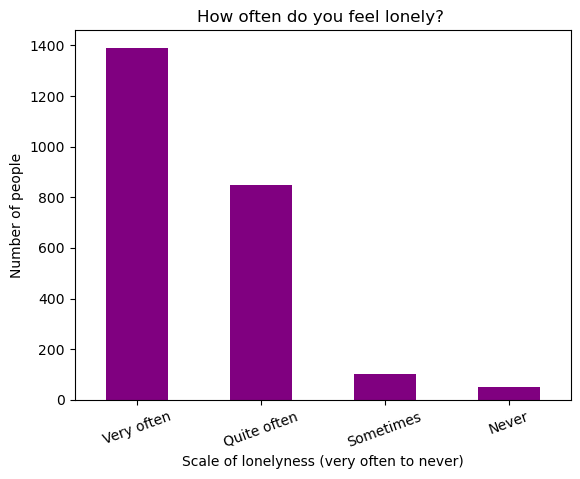

In [65]:
# Bar plot of dependant variable:
selection_df['F15'].value_counts().plot.bar(color='purple')

plt.title('How often do you feel lonely? ')
plt.xticks(np.arange(4), ['Very often', 'Quite often', 'Sometimes', 'Never'], rotation=20)
plt.ylabel('Number of people')
plt.xlabel('Scale of lonelyness (very often to never)')
plt.show()

**Observation:** As seen from the descriptive statistics, most people replied with 1 - 'very often'. The plot shows that there is a big proprotion of the data in the 1 and 2, meaning 'very often' and 'quite often' and only a few people who never feel lonely.

**Plots:** I'll first plot all the questions which do not have various sub-questions, this means they have only a 2 digit number. For this I'll set up a function to get the answer code from the code list. 

In [17]:
# Check column names
selection_df.columns

Index(['F01', 'F03', 'F0701', 'F0702', 'F0703', 'F0901', 'F0902', 'F0903',
       'F0904', 'F0905', 'F0906', 'F0907', 'F0910', 'F0911', 'F0912', 'F0913',
       'F10', 'F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206', 'F1301',
       'F1302', 'F1303', 'F1304', 'F1305', 'F1306', 'F1401', 'F1402', 'F1403',
       'F1404', 'F1405', 'F1406', 'F15', 'F16', 'F17_1', 'F17_2', 'F17_3',
       'F17_4', 'F17_5', 'F17_6', 'F17_7', 'F1801', 'F1802', 'F1803', 'F19_1',
       'F19_2', 'F19_3', 'F19_4', 'F19_5', 'F19_6', 'F21', 'F2201', 'F2202',
       'F2203', 'F2204', 'F23', 'F24', 'F28', 'F3001', 'F3002', 'F3003',
       'F3004', 'F3005', 'F3006', 'F3007', 'F3701', 'F3702', 'F3703', 'F3704',
       'F3705', 'F3706', 'F3707', 'F3708', 'F3709', 'T_S0203', 'K_GESCHLECHT'],
      dtype='object')

In [18]:
# Test with an example:
# Iterating over every row:
for idx, row in code_list.iterrows():
    # Selecting the question:
    if row['Frage_Code'] == 'F01':
       # Selecting the answer (here as an example == 1
        if row['Antwort_Code'] == 1:
            # Print the written answer of the number
            print(row['Antwort_Beschreibung'])     

Sehr ungern


In [19]:
# Set up function to look up the witten answer value:
def look_up_answer_value(FrageCode, AntwortCode):
    for idx, row in code_list.iterrows():
        if row['Frage_Code'] == FrageCode:
            if row['Antwort_Code'] == AntwortCode:
                return(row['Antwort_Beschreibung'])    

In [20]:
# Test to get all answers:
output = []
for item in selection_df['F01'].value_counts().index:
    v = look_up_answer_value('F01', item)
    output.append(v)
    
print(output)

['Sehr gerne', 'Eher gerne', 'Sehr ungern', 'Eher ungern', 'Keine Angabe', 'Weiss nicht']


In [21]:
# Define final function to look up answer giving the question, including the function to look up the answer:
def question_look_up_answer(FrageCode):
    output = []
    for item in selection_df[FrageCode].value_counts().index:
        answer_tx = look_up_answer_value(FrageCode, item)
        # Add a limitation of 15 characters - to avoid too long answers in the plots:
        if len(answer_tx) > 15:
            answer_tx = answer_tx[:15]
        output.append(answer_tx)
    return(output)

In [22]:
# Check for question 3:
question_look_up_answer('F03')

['Mietwohnung',
 'Genossenschafts',
 'eigenen Wohnung',
 'Alterseinrichtu',
 'eigenen Haus (E',
 'Wohnung in eine',
 'gemieteten Haus',
 'Keine Angabe']

In [23]:
def get_title(question_code):
    for i, row in code_list.iterrows():
        if row['Frage_Code'] == question_code:
            title = row['Frage_Titel']
    return(title)

/tmp/ipykernel_5362/824534638.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count_ax].set_xticklabels(question_look_up_answer(col), ha='right', rotation=60, fontsize=8)


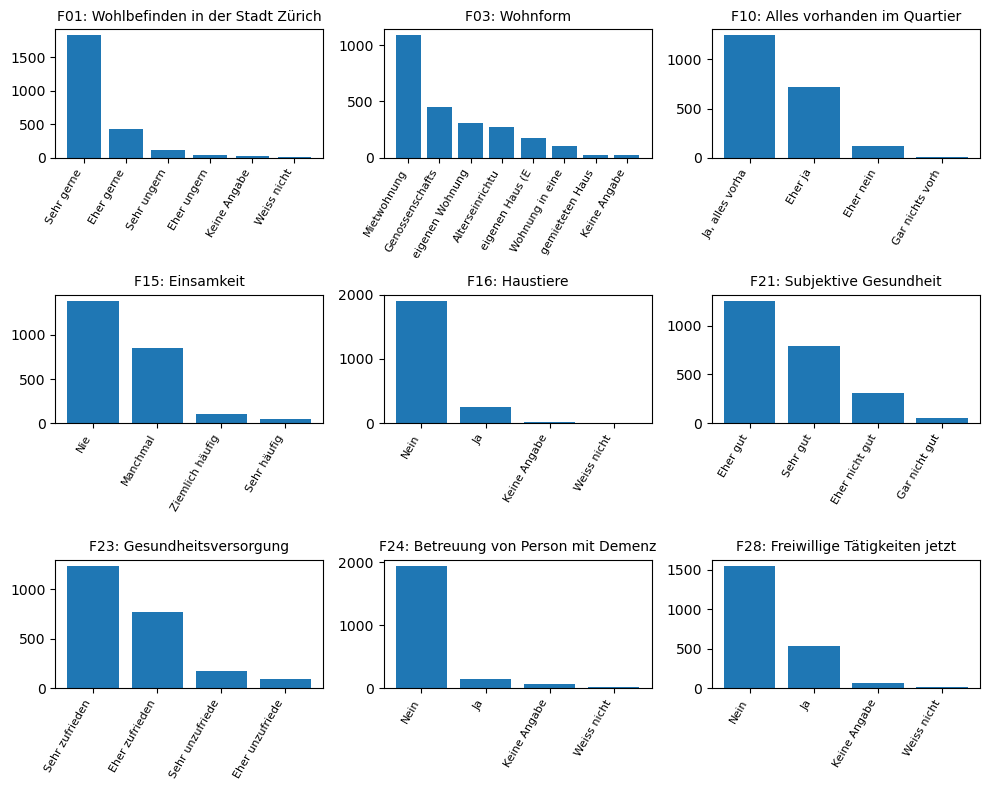

In [24]:
# Plot all the questions and answers of single questions:

# Set up subplot and flatten axis to get 1-D
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10,8))
axs = axs.flat  

# Counter for axis:
count_ax = 0

for ax, col in enumerate(selection_df.columns):
    # Condition for single questions with F + 2 digits:
    if len(col) <=3:
        axs[count_ax].bar(selection_df[col].value_counts().index.astype(str), selection_df[col].value_counts())
        # Set x ticks rotated and smaller
        axs[count_ax].set_xticklabels(question_look_up_answer(col), ha='right', rotation=60, fontsize=8)
        # Set title:
        axs[count_ax].set_title(get_title(col), fontsize=10) 
        #for i, row in code_list.iterrows():
        #titel = row['Frage_Titel']
        #axs[count_ax].set_title('Question {}'.format(col), fontsize=10)
            #axs[count_ax].set_title(row['Frage_Titel'], fontsize=10)
        count_ax += 1
        
plt.tight_layout()

**Observation:** We cannot directly see the relation between feautures, however, the answers have a tendency to be more positive. Many participants feel good living in the city, have a good health and are happy with the health institutions. Most people live in an appartement and most of them do not need to support a person with dementia.

##### **Next, plotting some of the questions with sub-questions:**

**First, I plot the answers of question 7 which enregistred the satisfaction with the living situation:**

In [25]:
# Make a dataframe with all the values counted for further analysis
counted_values = []
for col in selection_df: 
    counted_values.append(selection_df[col].value_counts())
df_counts = pd.DataFrame(counted_values)
df_counts

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,888.0,999.0
F01,NaN,113.0,47.0,424.0,1825.0,NaN,NaN,NaN,18.0,22.0
F03,NaN,1085.0,454.0,26.0,310.0,177.0,102.0,271.0,NaN,24.0
F0701,NaN,99.0,65.0,486.0,1491.0,NaN,NaN,NaN,NaN,NaN
F0702,NaN,87.0,99.0,568.0,1301.0,NaN,NaN,NaN,NaN,NaN
F0703,NaN,143.0,156.0,583.0,752.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
F3707,NaN,198.0,159.0,50.0,377.0,1595.0,NaN,NaN,NaN,NaN
F3708,NaN,189.0,509.0,234.0,412.0,1025.0,NaN,NaN,NaN,NaN
F3709,NaN,1483.0,399.0,89.0,130.0,122.0,NaN,NaN,NaN,NaN
T_S0203,NaN,1563.0,886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Check the columns which have values in the 0 column:
df_counts[~pd.isna(df_counts[0])]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,888.0,999.0
F17_1,1929.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_2,2093.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_3,1985.0,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_4,2079.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_5,714.0,1464.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_6,2030.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F17_7,2092.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F19_1,1924.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F19_2,2028.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F19_3,2125.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:** 13 columns include a binary encoding of 0 or 1. It is interesting to see that most of the questions are answered with 0 (=no).

In [27]:
df_counts.loc[['F0701', 'F0702', 'F0703']]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,888.0,999.0
F0701,NaN,99.0,65.0,486.0,1491.0,NaN,NaN,NaN,NaN,NaN
F0702,NaN,87.0,99.0,568.0,1301.0,NaN,NaN,NaN,NaN,NaN
F0703,NaN,143.0,156.0,583.0,752.0,NaN,NaN,NaN,NaN,NaN


In [28]:
df_F7 = df_counts.loc[['F0701', 'F0702', 'F0703']].drop([0.0, 5.0, 6.0, 7.0, 888.0, 999.0], axis=1)

In [29]:
# Get a list with answers:
answ_list = []
for idx in df_F7.index:
    for col in df_F7:
        answ = look_up_answer_value(idx, col)
        answ_list.append(answ)
    break   
print(answ_list)

['Sehr unzufrieden', 'Eher unzufrieden', 'Eher zufrieden', 'Sehr zufrieden']


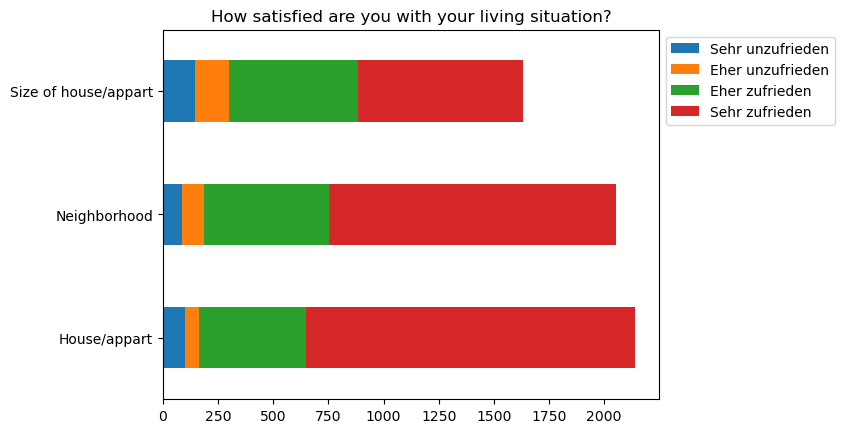

In [30]:
# Plot as a stacked bar plot
df_F7.plot.barh(stacked=True)
plt.title('How satisfied are you with your living situation?')
plt.legend(answ_list, bbox_to_anchor=(1, 1))
plt.yticks(np.arange(3), ['House/appart', 'Neighborhood', 'Size of house/appart'])

plt.show()

In [31]:
# Plot another question with subquestions which could be relevant for our target question: 
df_counts.loc[['F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206']]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,888.0,999.0
F1201,NaN,54.0,64.0,252.0,765.0,542.0,NaN,NaN,NaN,NaN
F1202,NaN,67.0,249.0,317.0,508.0,145.0,NaN,NaN,NaN,NaN
F1203,NaN,57.0,18.0,31.0,51.0,31.0,NaN,NaN,NaN,NaN
F1204,NaN,111.0,570.0,550.0,441.0,125.0,NaN,NaN,NaN,NaN
F1205,NaN,28.0,311.0,554.0,991.0,411.0,NaN,NaN,NaN,NaN
F1206,NaN,87.0,375.0,280.0,746.0,576.0,NaN,NaN,NaN,NaN


In [32]:
# Remove all the redundant rows
F12_df = df_counts.loc[['F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206']].drop(columns=[0.0, 6.0, 7.0, 888.0, 999.0])
F12_df

,1.0,2.0,3.0,4.0,5.0
F1201,54.0,64.0,252.0,765.0,542.0
F1202,67.0,249.0,317.0,508.0,145.0
F1203,57.0,18.0,31.0,51.0,31.0
F1204,111.0,570.0,550.0,441.0,125.0
F1205,28.0,311.0,554.0,991.0,411.0
F1206,87.0,375.0,280.0,746.0,576.0


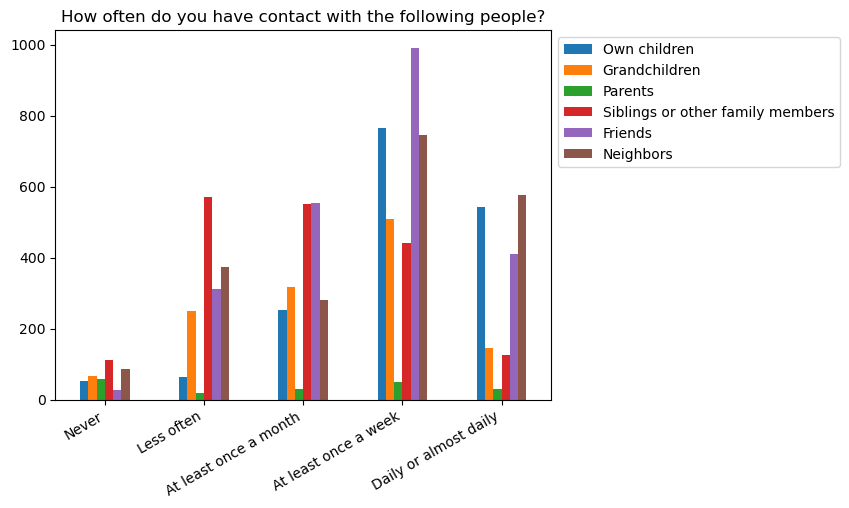

In [33]:
# Grouped bar plot for the questions about contacts
F12_df.T.plot.bar()

# Change the x axis values:
plt.xticks(
    np.arange(5), 
    ['Never','Less often','At least once a month','At least once a week','Daily or almost daily'], 
    rotation=30, 
    ha='right'
)
# Add legend and put outside:
plt.legend(['Own children', 'Grandchildren', 'Parents', 'Siblings or other family members', 'Friends', 'Neighbors'], bbox_to_anchor=(1, 1))
# Add title:
plt.title('How often do you have contact with the following people?')
plt.show()

**Observation:** a good amount of participatns have regular contact with relatives or friends. However, it is not visible if these are the same participants and some may be very isoltated.

**Relation between the features and the target**

In [34]:
# Group by the target value and taking the mean per category:
grouped_contacts = selection_df[['F15', 'F1201', 'F1202', 'F1203', 'F1204', 'F1205', 'F1206']].groupby('F15').mean()
grouped_contacts

,F1201,F1202,F1203,F1204,F1205,F1206
F15,,,,,,
1.0,4.025853,3.419703,2.928571,2.976482,3.721929,3.796787
2.0,4.010256,3.235556,3.000000,2.938538,3.559343,3.479290
3.0,3.777778,2.980392,2.000000,2.727273,3.223404,3.297297
4.0,3.647059,2.923077,2.333333,2.437500,2.820513,2.709677


In [35]:
# Get all answers for question F15:
output_F15 = []
for item in selection_df['F15'].value_counts().index:
    v = look_up_answer_value('F15', item)
    output_F15.append(v)
    
print(output_F15)

['Nie', 'Manchmal', 'Ziemlich häufig', 'Sehr häufig']


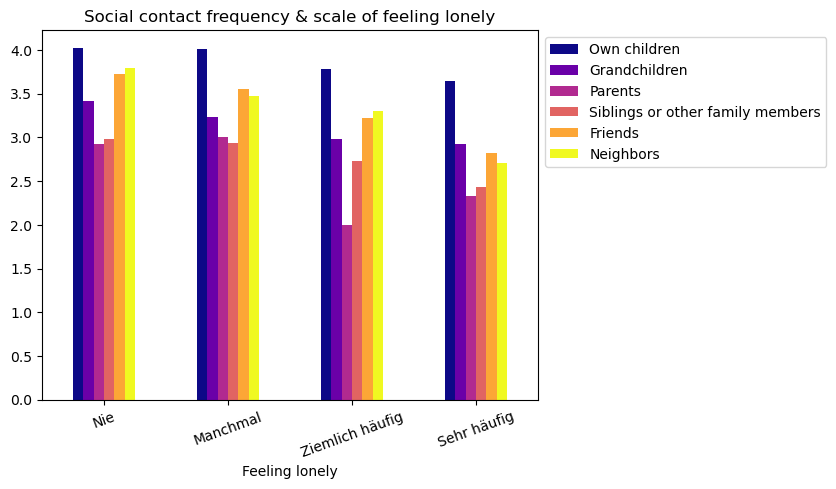

In [36]:
# Plot the mean of having contact with the different social groups by the scale of feeling lonely:

# Stacked bar plot:
grouped_contacts.plot.bar(cmap='plasma')
# Change the x axis values:
plt.xticks(
   np.arange(4), 
   output_F15, 
   rotation=20)
plt.xlabel('Feeling lonely')
# Add legend and put outside:
plt.legend(['Own children', 'Grandchildren', 'Parents', 'Siblings or other family members', 'Friends', 'Neighbors'], bbox_to_anchor=(1, 1))
# Add title:
plt.title('Social contact frequency & scale of feeling lonely')
plt.show()

**Observation:** There is a trend of having less contacts and feeling lonely. Most of the contacts people have are their childreen.

In [37]:
# I chose as a comparable question the question 21 which is about the health status:
df_counts.loc[['F21', 'F15']]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,888.0,999.0
F21,NaN,53.0,308.0,1258.0,789.0,NaN,NaN,NaN,NaN,NaN
F15,NaN,1390.0,848.0,103.0,50.0,NaN,NaN,NaN,NaN,NaN


In [38]:
# I drop the columns which have no values:
F21_F15_df = df_counts.loc[['F21', 'F15']].drop(columns=[0.0, 5.0, 6.0, 7.0, 888.0, 999.0])

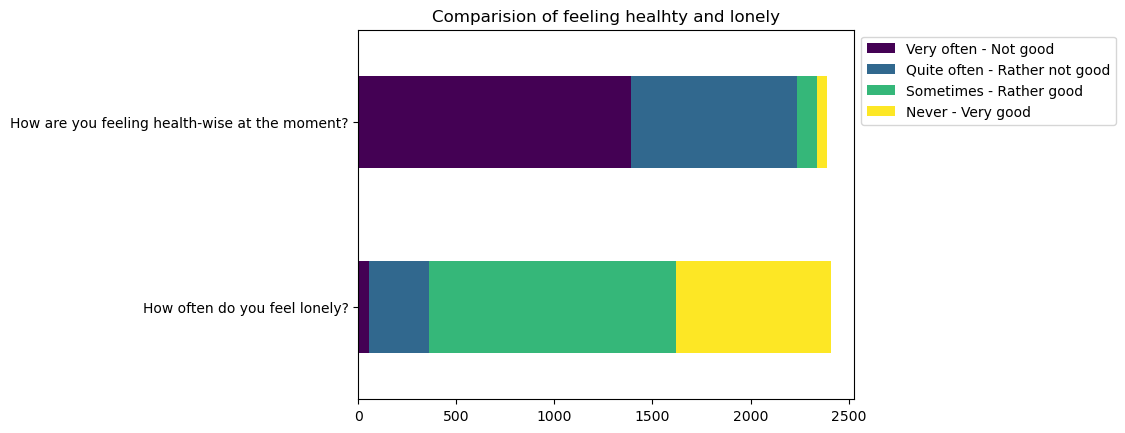

In [67]:
# Create a stacked bar plot of the two questions:
F21_F15_df.plot.barh(stacked=True, cmap='viridis')

plt.legend(['Very often - Not good', 'Quite often - Rather not good', 'Sometimes - Rather good', 'Never - Very good'], bbox_to_anchor=(1, 1))
plt.yticks(
    np.arange(2), 
    ['How often do you feel lonely?', 'How are you feeling health-wise at the moment?'])
plt.title('Comparision of feeling healhty and lonely')

plt.show()

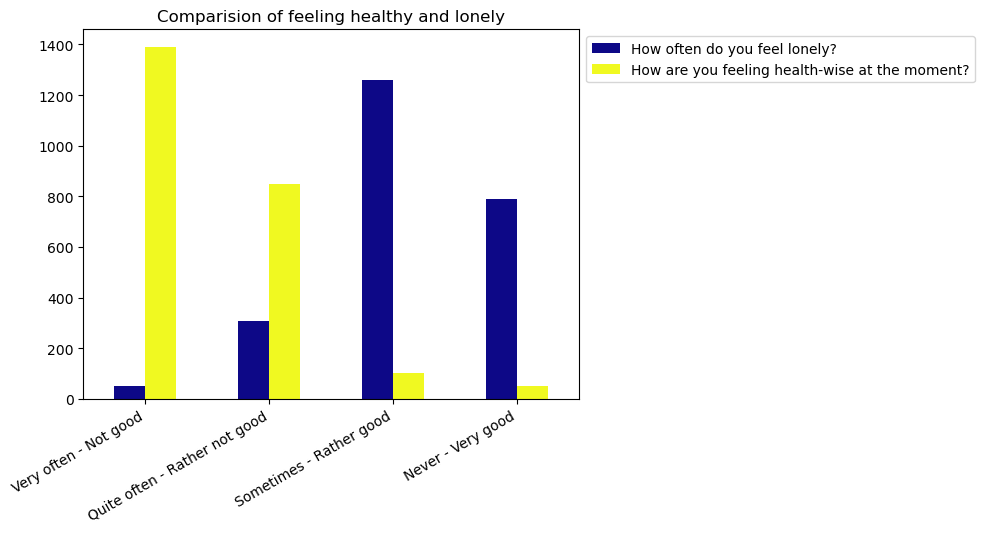

In [40]:
# Create a grouped bar plot for the two questions:
F21_F15_df.T.plot.bar(cmap='plasma')

plt.xticks(
    np.arange(4), 
    ['Very often - Not good', 'Quite often - Rather not good', 'Sometimes - Rather good', 'Never - Very good'], 
    rotation=30, 
    ha='right'
)
plt.legend(['How often do you feel lonely?', 'How are you feeling health-wise at the moment?'], bbox_to_anchor=(1, 1))
plt.title('Comparision of feeling healthy and lonely')

plt.show()

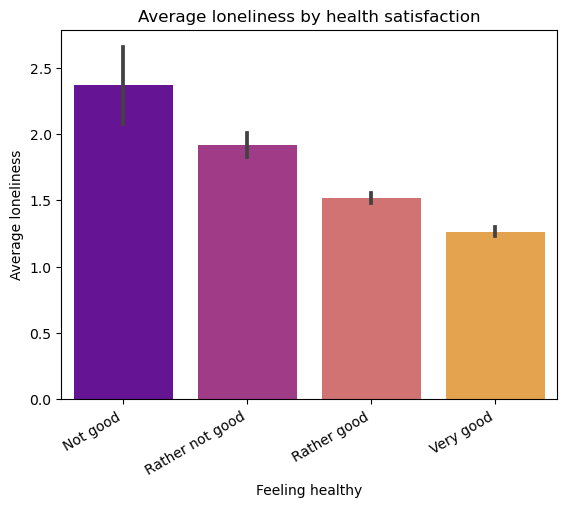

In [69]:
# Barplot of averaged loneliness & health satisfaction
sns.barplot(data=selection_df, x='F21', y='F15', palette='plasma')

plt.xticks(
    np.arange(4), 
    ['Not good', 'Rather not good', 'Rather good', 'Very good'], 
    rotation=30, 
    ha='right'
)
plt.xlabel('Feeling healthy')
plt.ylabel('Average loneliness')
plt.title('Average loneliness by health satisfaction')
plt.show()

**Observation:** The grouped bar plot shows better the relationship than the stacked bar plot. We can see that many people feel lonely, however, most people feel good health-wise. It could be an inverse relation. However, the barplot does not well show a correlation. Therefore, I'll look at any correlation using a heat map:

In [70]:
# First, we need a correlation matrix:
corr_F1_F15_nor = pd.crosstab(selection_df['F15'], selection_df['F21'], normalize='index')
corr_F1_F15 = pd.crosstab(selection_df['F15'], selection_df['F21'])
corr_F1_F15

F21,1.0,2.0,3.0,4.0
F15,,,,
1.0,12,103,666,591
2.0,21,142,498,172
3.0,7,41,45,9
4.0,12,18,15,4


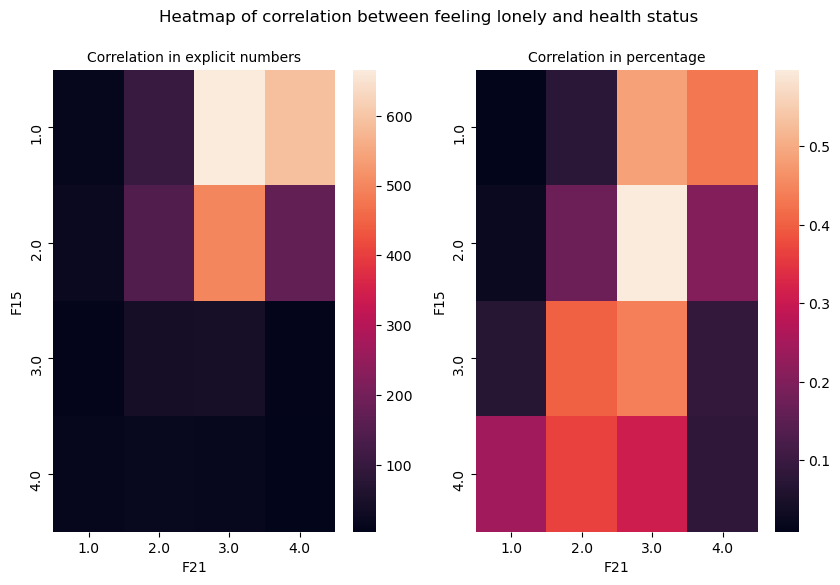

In [71]:
# Create a heatmap of the counts and explicit numbers:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,6))

sns.heatmap(corr_F1_F15, ax=ax[0])
sns.heatmap(corr_F1_F15_nor, ax=ax[1])
fig.suptitle('Heatmap of correlation between feeling lonely and health status') 
ax[0].set_title('Correlation in explicit numbers', fontsize=10)
ax[1].set_title('Correlation in percentage', fontsize=10)

plt.show()

**Observation:** It shows that people who are feeling quite healthy also feel rather lonely. This is something to look at more in detail later. 

**Relation between the target variable and a binary encoded question:**

In [72]:
# Analyse the question about pets and feeling lonely:
selection_df['F16'].value_counts()

2.0      1909
1.0       253
999.0      12
888.0       4
Name: F16, dtype: int64

In [73]:
# Check NAs
selection_df['F16'].isna().sum()

271

**Observation:** there are quite some NA's. For the moment, I keep the data like this. Later I'd impute these values. I remove the two categories of not knowing or no answer, since there are only a few cases.

In [74]:
# Remove the 16 cases about not knowing/no answer (999.& 888)

F16_df_drop = selection_df.drop(selection_df[(selection_df['F16'] == 999.0) |  (selection_df['F16'] == 888.0)].index)
F16_df_drop['F16'].value_counts()

2.0    1909
1.0     253
Name: F16, dtype: int64

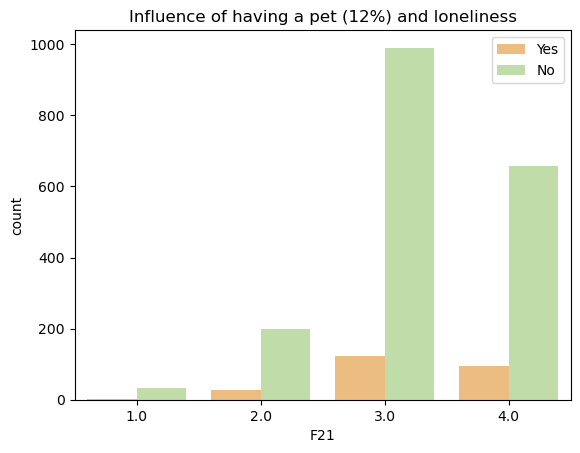

In [75]:
# Use seaborn to plot a barplot
sns.countplot(data=F16_df_drop, x='F21', hue='F16', palette='Spectral')

plt.legend(['Yes', 'No'])
plt.title('Influence of having a pet ({}%) and loneliness'.format(round(253/(253 + 1909)*100),1))
plt.show()

**Observation:** Only 12% of the participants have a pet and the distribution amongst the different categories of feeling lonely is rather identical.

In [76]:
# Using the same dataframe with the excluded NaN's, analysing how the living form and owning a pet relate:
F16_df_drop['F03']

0       2
1       1
2       1
3       1
4       4
       ..
2444    1
2445    1
2446    1
2447    1
2448    7
Name: F03, Length: 2433, dtype: int64

In [77]:
# Create a crosstab:
cross_pet_living = pd.crosstab(F16_df_drop['F03'], F16_df_drop['F16'], normalize='index')
cross_pet_living

F16,1.0,2.0
F03,,
1,0.115634,0.884366
2,0.097996,0.902004
3,0.192308,0.807692
4,0.126623,0.873377
5,0.197674,0.802326
6,0.039216,0.960784
999,0.083333,0.916667


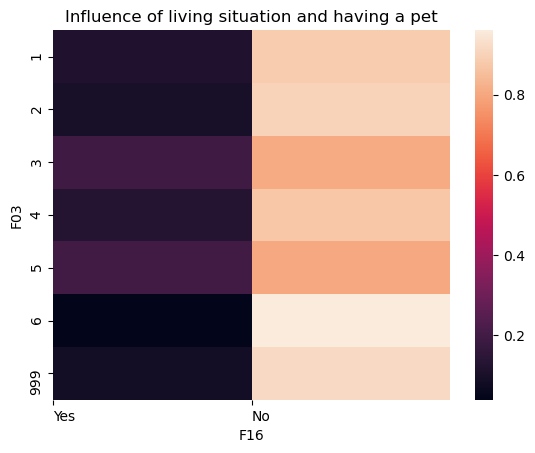

In [78]:
sns.heatmap(cross_pet_living)

plt.xticks(range(2), ['Yes', 'No'], ha='left')
plt.title('Influence of living situation and having a pet')
plt.show()

**Observation:** The correlation is very similar across all the different living situations, however, living in a house has a higher correlation (3 & 5).

**Target variable and gender:**

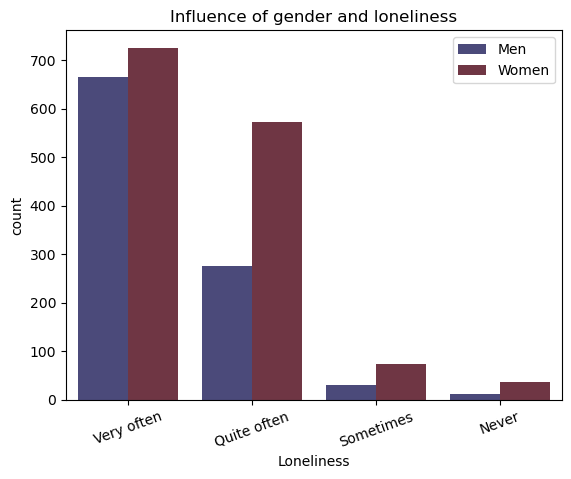

In [79]:
# Use seaborn to plot a barplot
sns.countplot(data=selection_df, x="F15", hue="K_GESCHLECHT", palette="icefire")

plt.title("Influence of gender and loneliness")
plt.xlabel("Loneliness")
plt.xticks(
    np.arange(4), ["Very often", "Quite often", "Sometimes", "Never"], rotation=20
)
plt.legend(["Men", "Women"])
plt.show()

In [80]:
pd.crosstab(selection_df['F15'], selection_df['K_GESCHLECHT'], normalize='index')

K_GESCHLECHT,1,2
F15,,
1.0,0.478417,0.521583
2.0,0.325472,0.674528
3.0,0.291262,0.708738
4.0,0.260000,0.740000


Check the overall correlation of columns with the target variable:

In [81]:
# Use the function corrwith to get the correlation factor:
correlation_F15 = pd.DataFrame(selection_df.corrwith(selection_df['F15']))
correlation_F15

,0
F01,0.007284
F03,0.014496
F0701,-0.115953
F0702,-0.026318
F0703,-0.085227
...,...
F3707,-0.155534
F3708,-0.130696
F3709,-0.047307
T_S0203,0.066499


In [82]:
correlation_F15[(correlation_F15[0] >= 0.10)]

,0
F1301,0.149876
F1302,0.110724
F1303,0.210020
F1304,0.141432
F1305,0.117543
F15,1.000000
F17_1,0.373132
F17_2,0.206277
F17_3,0.147828
F17_4,0.131393


**Observation:** the highest correlation with the target variable have the questions 13 and 18, 19.1 and the sex. These need to be further analysed.

### (b) How does the EDA inform your project plan?

**General:**
- The features are all categorical with some of them being encoded as binary, some with up to 10 different categories. 
**Target:**
- Features related to the social environment such as contacts show an influence on feeling less lonely. 
- A good health status showed some possible correlation with being alone but it is not very clear. 
- A lot of people feel lonely. This has to be taken into account for any training model in order to have an equal distributed training dataset. 
- It might be also a possibility to select the health-status as a target. 

### (c) What further EDA do you plan for project?

1. I will address the NAs and replace them with an appropriate method as described above (imputation: first by simply using the mode, then with sklearn imputation package).
2. I will visualise more of the questions with subquestions and check correlations with the question about loneliness and health-status. Especially for the questions 13 and 18 and 19.1, as the calculation showed the highest correlation. For this, I will use stacked bar plots with the mean value of each sub-question as the y-value and the scale of feeling lonely as the x-value. I will also show the correlation in a correlation table and heatmap. Also, I'll use a bar chart with x representing a given question and on the y-axis using the mean of a loneliness index. 
3. I will further look at the health status and see if there are is a better correlations to identify.
4. Perform feature engineering:
- First, I'll add features by combining questions for questions with sub-questions, for example how much support they receive or give, or all the questions about the use of digigtal tools could be combined as an digital index. 
- Second, I'll perform one-hot encoding to have every answer as a column for the future ML models. 
- Third, splitting the data into train, validation and test data. I'll split the data first into 80% training data and 20% test data. Out of the 80% training data, I'll use 20% as validation data. Given the unbalanced distribution of the data, I'd need to ensure that the training data includes a good representation of the different target values. This means, the traiings data may need to be adapted. 
- Lastly, I'll perform dimensional reduction by using PCA to visualise the high-dimension of the data set into a 2D plot for the regression, decision tree and random forest models. It could help reducing overfitting. To set the right number of features to use, I'll use a scree plot. 


## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

The goal of my project is to predict on a scale from 1 (never) to 4 (very often) how lonely a person is given their lifestyle factors and socio-demographics (features of the dataset). 


- Identify and discuss suitable machine learning models, baselines, metrics and evaluation strategies
- Tune the different models, analyze their performance
- Discuss the results and potential trade-offs (complexity, interpretability, computational resources) using the appropriate terminology

### (b) What models are you planning to use and why?

- As a baseline model, I'll use the dummy classifier from sklearn with an uniform strategy because the data is imbalance. The uniform strategy will predict each category randomly. 
- First, I'd train a model with only a set of approx. 10 features (health status, social contacts, being satisfied with living situation) using an ordinal regression since the dependant variable is ordered. 
- Then, I'd add the entire selected features. 
- As a second model, I'd choose a decision tree model since the data set is categorical. I'd then compare if the random forest model gets a better results or if it overfits the data because of its complexity.
- As a last model, I'd use a neural network to see if it can outperform the other models. I'd train it first with the selected features and then with all the features. 

### (c) Please tell us your detailed machine learning strategy 

- For the ordinal regression model, I'd use the statsmodel: https://www.statsmodels.org/stable/examples/notebooks/generated/ordinal_regression.html with the defaut 'logit' strategy and try probit to see if it gives more accurate results. 
- For the decision tree model, I'd tune the model depth and for the random forest the depth and the estimators to decide for the best values. 
- For the neural network, I'd use the keras model with one conv2D layer, one maxpooling 2d reduction and an output layer with softmax. Then I'd add more conv2D layers and maxpooling to see if performance improves (to avoid overfitting). 

- For the support vector machine, I'd use svm from sklearn and tune the regularisation parameter gamma and the coefficient C to avoid overfitting. I'd try different kernels other than the defaut 'rbf'. Also, I'd add class weights to address the imbalanced representation of the categories.

## 5) Additional information

< If needed, discuss here any elements or approaches that do not fit with the above categories >